In [3]:
# Tentar fazer previsão de vazão usando a lib Prophet
# seguindo o tutorial disponibilizado no próprio site da lib
# <https://facebook.github.io/prophet/docs/quick_start.html#python-api>

import pandas as pd, matplotlib.pyplot as plt
from prophet import Prophet

plt.style.use('seaborn-whitegrid')

In [6]:
# Ler o arquivo XLSX com dados de vazão do rio a ser trabalhado.

fn = "dados.xlsx"
df = pd.read_excel(fn)
df.head()

,ds,y
0,2014-07-01,0.7890
1,2014-07-02,0.7531
2,2014-07-03,0.7890
3,2014-07-04,0.7890
4,2014-07-05,0.7531


In [7]:
m = Prophet()
m.fit(df)

23:23:58 - cmdstanpy - INFO - Chain [1] start processing
23:24:01 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
7665,2021-12-27
7666,2021-12-28
7667,2021-12-29
7668,2021-12-30
7669,2021-12-31


In [9]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7665,2021-12-27,5.919256,-10.749572,24.398461
7666,2021-12-28,5.935501,-12.519859,21.775727
7667,2021-12-29,5.815549,-11.063239,23.163817
7668,2021-12-30,5.665511,-12.272930,22.437055
7669,2021-12-31,5.778658,-11.618815,22.664414


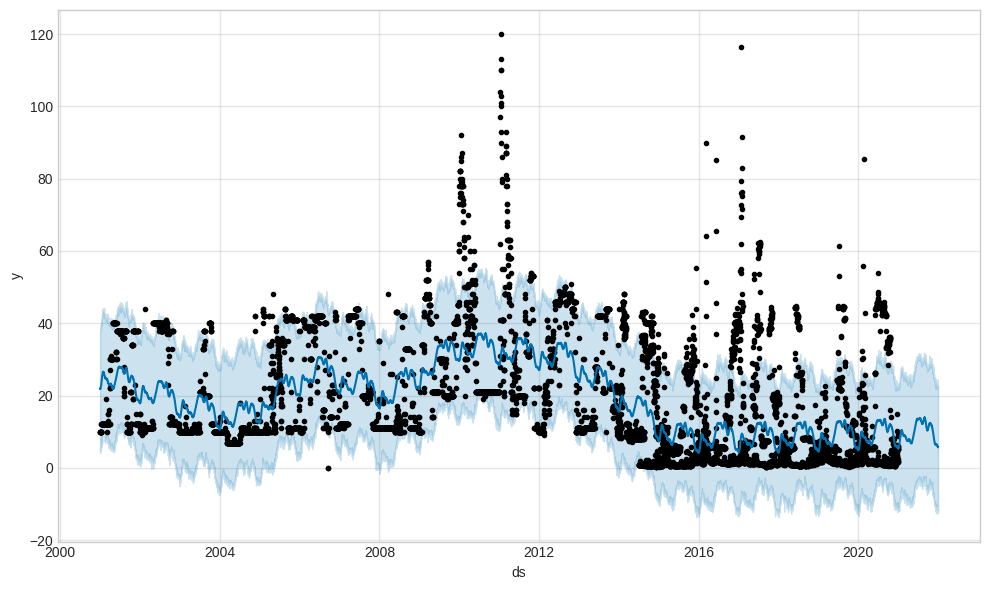

In [10]:
fig1 = m.plot(forecast)

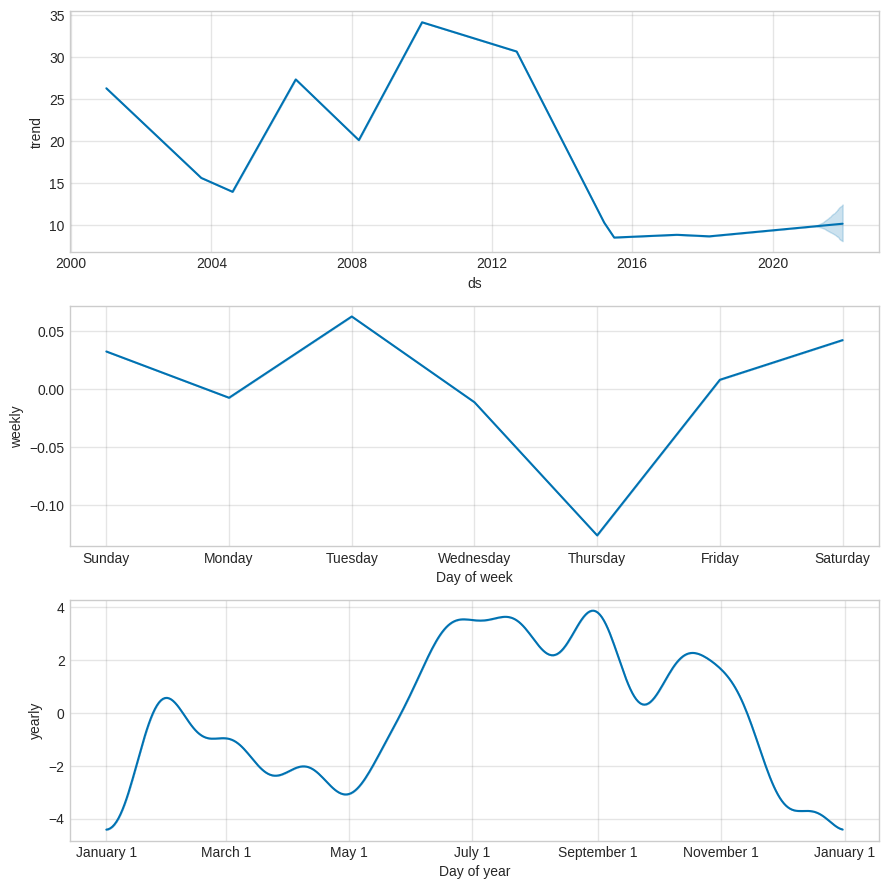

In [11]:
fig2 = m.plot_components(forecast)


In [12]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

NameError: name 'go' is not defined